In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task #1: Risk Premium

Consider the setting of the last Python work sheet. Write a Python program that computes: (i) Expected Wealth, (ii) Certainty Equivalent, (iii) Risk Premium in Euros and (iv) Risk Premium in percentage terms. Compare these quantities for the two utility specifications of your last Python work sheet. Interpret results in an economically meaningful way. 

$$
U(W_t) = 
\begin{cases}
\frac{W^{1-\gamma}_t - 1}{1-\gamma}, \; \gamma \geq 0, \gamma \neq 1 \\
ln (W_t), \; \gamma = 1
\end{cases}
$$

In [2]:
def U(w,gamma):
    if gamma==1:
        return np.log(w)
    else:
        return (w**(1-gamma)-1)/(1-gamma)

Expected Wealth:

In [3]:
def expected_wealth(W, prob):
    return np.sum(W * prob)

Certainty Equivalent (risk-free payoff that results in same expected U than gamble):

Solve for wealth:
$$
W_t(U) = 
\begin{cases}
((1 - \gamma) \cdot U + 1)^{\frac{1}{1-\gamma}}, \; \gamma \geq 0, \gamma \neq 1 \\
exp(U), \; \gamma = 1
\end{cases}
$$

In [4]:
def inverted_utility(gamma, U):
    if gamma==1:
        return np.exp(U)
    else:
        return ((1-gamma)*U+1)**(1/(1-gamma))

In [5]:
def certainty_equivalent(gamma, prob, W):
    expected_utility = expected_wealth(U(W, gamma), prob)
    return inverted_utility(gamma, expected_utility)

Risk Premium:

In [6]:
def risk_premium_abs(gamma, prob, W):
    return expected_wealth(W, prob) - certainty_equivalent(gamma, prob, W)

In [7]:
def risk_premium_pct(gamma, prob, W):
    return (expected_wealth(W, prob) - certainty_equivalent(gamma, prob, W))*100 / certainty_equivalent(gamma, prob, W)

Solve for $\gamma=0.2$; $\gamma=0.4$:

In [8]:
initial_wealth = 1000
W = np.array([1, 999999])
prob = np.array([0.5, 0.5])

In [9]:
gamma = 0.2

print(f"gamma = {gamma}")
print(f"Expected Wealth: {expected_wealth(W, prob)}")
print(f"Certainty Equivalent: ", certainty_equivalent(gamma, prob, W))
print(f"Risk Premium (absolute): ", risk_premium_abs(gamma, prob, W))
print(f"Risk Premium (percentage): ", risk_premium_pct(gamma, prob, W))

gamma = 0.2
Expected Wealth: 500000.0
Certainty Equivalent:  420456.11676226143
Risk Premium (absolute):  79543.88323773857
Risk Premium (percentage):  18.918474501041707


In [10]:
gamma = 0.4

print(f"gamma = {gamma}")
print(f"Expected Wealth: {expected_wealth(W, prob)}")
print(f"Certainty Equivalent: ", certainty_equivalent(gamma, prob, W))
print(f"Risk Premium (absolute): ", risk_premium_abs(gamma, prob, W))
print(f"Risk Premium (percentage): ", risk_premium_pct(gamma, prob, W))

gamma = 0.4
Expected Wealth: 500000.0
Certainty Equivalent:  315111.82425604877
Risk Premium (absolute):  184888.17574395123
Risk Premium (percentage):  58.673829895293814


# Task #2: Mean-Variance Approximation

Consider the setting of the last Python work sheet. Write a python program that computes the second-oder Taylor approximation of the expected utility function. Plot the exact utility function for a risk aversion of your choice and compare it to the mean-variance approximation.

N-th order Taylor series of $f(x)$ evaluated around a:

$$
P(x) = \sum_{n=0} ^ {N} \frac {f^{(n)}(a)}{n!} (x-a)^{n}
$$

Utility function:

$$
U(W_t) = 
\begin{cases}
\frac{W^{1-\gamma}_t - 1}{1-\gamma}, \; \gamma \geq 0, \gamma \neq 1 \\
ln (W_t), \; \gamma = 1
\end{cases}
$$

$$
U'(W_t) = 
\begin{cases}
W_t^{-\gamma}, \; \gamma \geq 0, \gamma \neq 1 \\
\frac{1}{W_t}, \; \gamma = 1
\end{cases}
$$

$$
U''(W_t) = 
\begin{cases}
-\gamma W_t^{-\gamma-1}, \; \gamma \geq 0, \gamma \neq 1 \\
-\frac{1}{W_t^2}, \; \gamma = 1
\end{cases}
$$

In [11]:
def U_prime(w,gamma):
    if gamma==1: 
        return 1/w
    else: 
        return w**(-gamma)

    
def U_doubleprime(w,gamma):
    if gamma==1: 
        return -(1/w**2) 
    else: 
        return -gamma * w**(-gamma-1)

Second-Order Taylor series expansion of $U(W_t)$ around the expected value $E[W_t]$:

\begin{align*}
U(W_t) \approx U(E[W_t]) + U'(E[W_t]) \times (W_t - E[W_t]) + \frac{1}{2} U''(E[W_t]) \times (W_t - E[W_t])^2
\end{align*}

In [12]:
def second_order_taylor(E_w,w,gamma):
    return U(E_w,gamma) + U_prime(E_w,gamma) * (w-E_w) + 0.5 * U_doubleprime(E_w,gamma) * (w-E_w)**2

Taking expectations on both sides, using the fact $E[W_t - E[W_t]]=0$ and the definition of $var(W_t) \equiv E[(W_t - E[W_t])^2]$

\begin{align*}
E[U(W_t)] \approx U(E[W_t]) + \frac{1}{2} U''(E[W_t]) \times var(W_t)
\end{align*}

In [13]:
def expected_utility_approx(E_w,gamma,var_w):
    return U(E_w,gamma) + 0.5 * U_doubleprime(E_w,gamma) * var_w

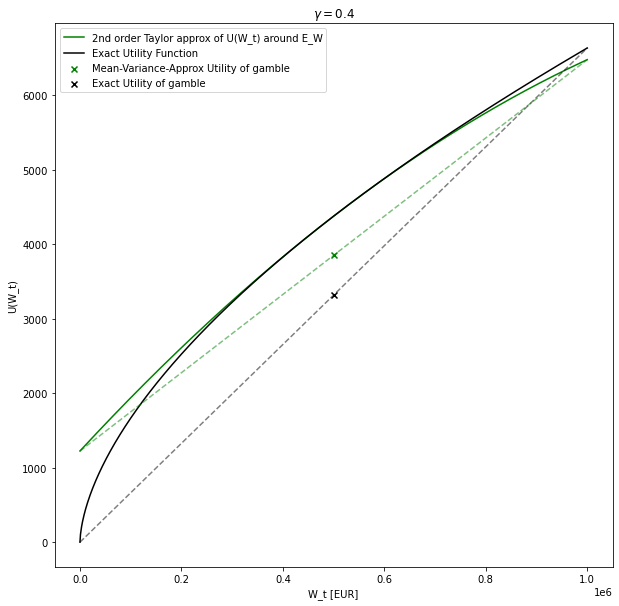

In [14]:
gamma = 0.4
W_min = 1
W_max = 999999
E_W = np.mean([W_min, W_max])
var_W = np.var([W_min, W_max])

W_t = np.linspace(W_min,W_max,1000)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(W_t, second_order_taylor(E_W, W_t, gamma), label = "2nd order Taylor approx of U(W_t) around E_W", 
        color='green')
ax.plot(W_t, U(W_t, gamma), label = "Exact Utility Function", 
        color='black')

ax.plot([W_min,W_max], [U(W_min, gamma), U(W_max, gamma)], 
        linestyle='--', color='black', alpha=0.5)
ax.plot([W_min,W_max], [second_order_taylor(E_W, W_min, gamma), second_order_taylor(E_W, W_max, gamma)], 
        linestyle='--', color='green', alpha=0.5)

ax.scatter(E_W, expected_utility_approx(E_W,gamma,var_W), marker='x', color='green', 
           label='Mean-Variance-Approx Utility of gamble')
ax.scatter(E_W, 0.5*U(W_min,gamma)+0.5*U(W_max,gamma), marker='x', color='black', 
           label='Exact Utility of gamble')

plt.title(f'$\gamma = {gamma}$')
plt.xlabel('W_t [EUR]')
plt.ylabel('U(W_t)')
ax.legend()
plt.show()